# Credit EDA Case Study

### Poonam Bhonge
#### Date: 1st dec 2021

## Introduction
* This case study aims to give us an idea of applying EDA in a real business scenario.

* In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how   data is used to minimise the risk of losing money while lending to customers/ giving loan to customers.

**Problem Statement:** 
* When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

* Company/Bank wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

 ## A. Import libraries and modules and filter warnings

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Reading data into data frames
# Read the csv file using 'read_csv' method

# 'application_data.csv'
# Contains all the information of the client at the time of application.
# The data is about whether a client has payment difficulties.
# 'application_data.csv' - Stored into df named "Fresh_Application"
Fresh_Application = pd.read_csv('C:/Users/prinka/Downloads/IIITB NOTEBOOKS/EDA_GROUP_CASE_STUDY/reedacreditcasestudy/application_data.csv')

# 'previous_application.csv'
# Contains information about the client’s previous loan data. 
# It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

#'previous_application.csv'-Stored into df named "Previous_Application"
Previous_Application = pd.read_csv('C:/Users/prinka/Downloads/IIITB NOTEBOOKS/EDA_GROUP_CASE_STUDY/reedacreditcasestudy/previous_application.csv')

## B. Fresh_Application Data Inspection 

In [4]:
Fresh_Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Check the number of rows and columns in the dataframe Fresh_Application

Fresh_Application.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe Fresh_Application

Fresh_Application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Check the summary for the numeric columns in dataframe Fresh_Application

Fresh_Application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Check for null values to inspect null values in dataframe Fresh_Application

Fresh_Application.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

## C. Previous_Application Data Inspection 

In [9]:
Previous_Application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check the number of rows and columns in the dataframe Previous_Application

Previous_Application.shape

(1670214, 37)

In [11]:
# Check the column-wise info of the dataframe Previous_Application

Previous_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
# Check the summary for the numeric columns in dataframe Previous_Application

Previous_Application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
# Check for null values to inspect null values in dataframe Previous_Application

Previous_Application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## D. Data Analysis - Fresh_Application dataset to examine and interpret it properly

### D.1 Examining the Fresh_Application dataset for null values

In [14]:
# Calculate percentage of missing values in all columns to understand data to be imputed or not
round(Fresh_Application.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [15]:
# For better analysis as we learnt we can drop columns with more number of null values. 
# As we observe from above output there are columns more than 50 % null values which wont be that helpful to analyse properly
# Remove all the columns with more than 50% nulls values

Fresh_Application = Fresh_Application.loc[:,Fresh_Application.isnull().mean()<=0.5]

# Inspecting new shape of df Fresh_Application
Fresh_Application.shape
# Out of 122 columns we had in original dataframe Fresh_Application after removing columns having more null values
# We are left with 81 columns

(307511, 81)

In [16]:
# As we learnt in EDA more null values columns can be dropped
# Where as less null values columns can be imputed with mean/median for numerical columns and mode for categorical columns
# As we saw in output when calcualted percentage of null values in columns, We observe that there are columns
# with less or equal to than 13% null vallues which can be considered for imputation for better analysis and interpretation

list(Fresh_Application.columns[(Fresh_Application.isnull().mean()<=0.13) & (Fresh_Application.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### D.2 Examining for values which can be imputed in columns for better dataset interpretation with proper data

### D.2.1. EXT_SOURCE_2 imputation

In [17]:
# value_counts() to get unique rows with respective count in column

In [18]:
Fresh_Application['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

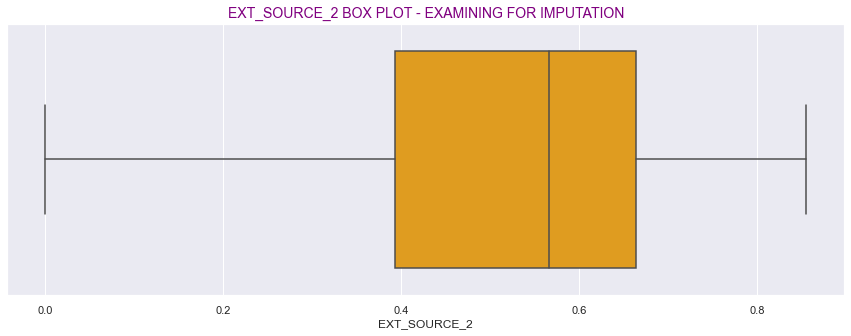

In [19]:
# EXT_SOURCE_2 is a continuous variable
# checking for outliers by plotting boxplot

sns.set(style="darkgrid")
plt.figure(figsize=[15,5])
ext_source_2 = sns.boxplot(Fresh_Application['EXT_SOURCE_2'], color='orange')
ext_source_2.set_title('EXT_SOURCE_2 BOX PLOT - EXAMINING FOR IMPUTATION',fontsize=14,fontweight= 9,color='purple') 
plt.show()

In [20]:
# EXT_SOURCE_2 dont have any outliers, Better is we can use mean to impute the column

imputed_Value = round(Fresh_Application['EXT_SOURCE_2'].mean(),2)
print(f'As EXT_SOURCE_2 dont have any outliers - column can be imputed with mean of the column : {imputed_Value}')

As EXT_SOURCE_2 dont have any outliers - column can be imputed with mean of the column : 0.51


### D.2.2. OCCUPATION_TYPE imputation

In [21]:
Fresh_Application['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

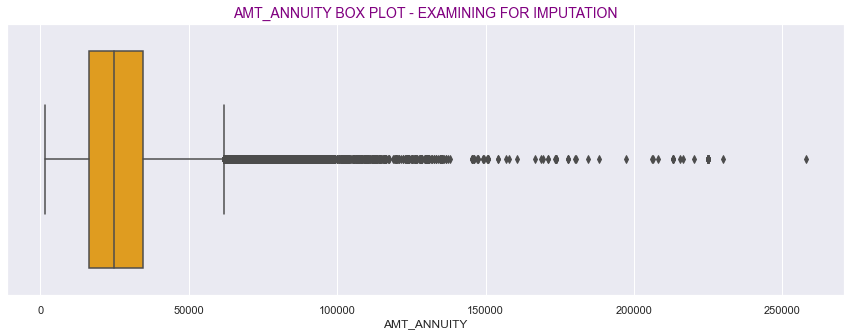

In [22]:
# AMT_ANNUITY is a continuous variable
# checking for outliers by plotting boxplot

sns.set(style="darkgrid")
plt.figure(figsize=[15,5])
ext_source_2 = sns.boxplot(Fresh_Application['AMT_ANNUITY'], color='orange')
ext_source_2.set_title('AMT_ANNUITY BOX PLOT - EXAMINING FOR IMPUTATION',fontsize=14,fontweight= 9,color='purple') 
plt.show()

In [23]:
# AMT_ANNUITY has many deviating far outliers after 50000, Better is we can use median to impute the column

imputed_Value = round(Fresh_Application['AMT_ANNUITY'].median(),2)
print(f'AMT_ANNUITY has outliers - column can be imputed with median of the column : {imputed_Value}')

AMT_ANNUITY has outliers - column can be imputed with median of the column : 24903.0


# D.2.3. NAME_TYPE_SUITE imputation

In [24]:

Fresh_Application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
# As NAME_TYPE_SUITE is categorical column we should use mode to impute data in column
imputed_Value = Fresh_Application['NAME_TYPE_SUITE'].mode()
print(f'NAME_TYPE_SUITE(categorical column) - imputed with mode of the column : {imputed_Value[0]}') 

NAME_TYPE_SUITE(categorical column) - imputed with mode of the column : Unaccompanied


### D.2.4. CNT_FAM_MEMBERS imputation

In [26]:
Fresh_Application['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

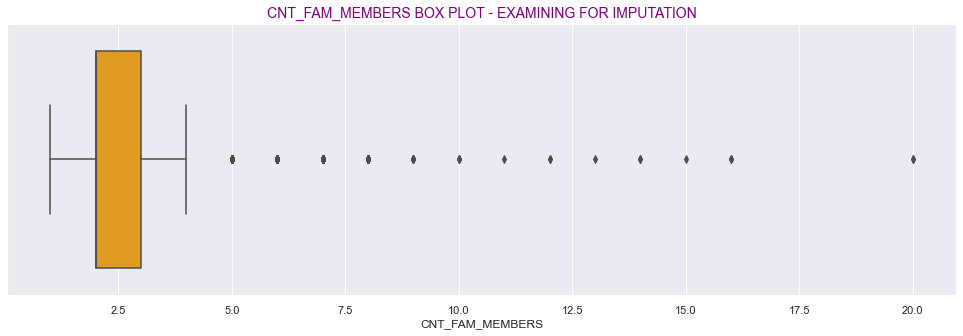

In [27]:
# CNT_FAM_MEMBERS(count of family members) - continuous variable
# checking for outliers by plotting boxplot

sns.set(style="darkgrid")
plt.figure(figsize=[17,5])
ext_source_2 = sns.boxplot(Fresh_Application['CNT_FAM_MEMBERS'], color='orange')
ext_source_2.set_title('CNT_FAM_MEMBERS BOX PLOT - EXAMINING FOR IMPUTATION',fontsize=14,fontweight= 9,color='purple') 
plt.show()

In [28]:
# CNT_FAM_MEMBERS has many deviating far outliers after 5, Better is we can use median to impute the column

imputed_Value = round(Fresh_Application['CNT_FAM_MEMBERS'].median(),2)
print(f'CNT_FAM_MEMBERS has outliers - column can be imputed with median of the coumn : {imputed_Value}')

CNT_FAM_MEMBERS has outliers - column can be imputed with median of the coumn : 2.0


### D.2.5. AMT_GOODS_PRICE imputation

In [29]:
 Fresh_Application['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

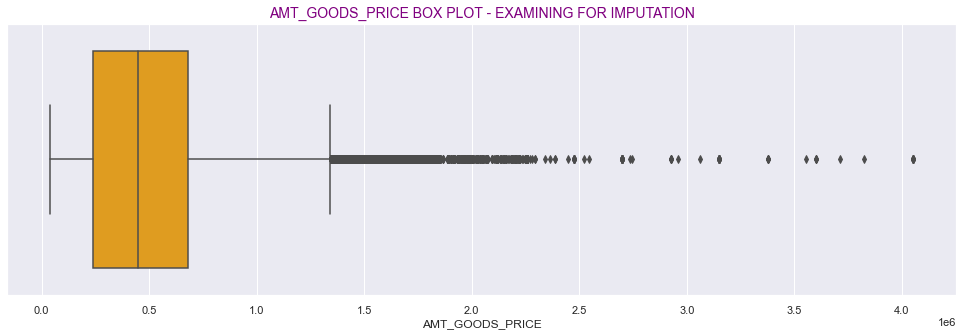

In [30]:
# AMT_GOODS_PRICE is a continuous variable
# checking for outliers by plotting boxplot

sns.set(style="darkgrid")
plt.figure(figsize=[17,5])
ext_source_2 = sns.boxplot(Fresh_Application['AMT_GOODS_PRICE'], color='orange')
ext_source_2.set_title('AMT_GOODS_PRICE BOX PLOT - EXAMINING FOR IMPUTATION',fontsize=14,fontweight= 9,color='purple') 
plt.show()

In [31]:
# AMT_GOODS_PRICE has many deviating far outliers after 1.2, Better is we can use median to impute the column

imputed_Value = round(Fresh_Application['AMT_GOODS_PRICE'].median(),2)
print(f'AMT_GOODS_PRICE has outliers - column can be imputed with median of the coumn : {imputed_Value}')

AMT_GOODS_PRICE has outliers - column can be imputed with median of the coumn : 450000.0


In [32]:
#Checking for all float data type columns
Fresh_Application.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [33]:
#Converting these all columns to int64
ColumnToConvertToInt = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Fresh_Application.loc[:,ColumnToConvertToInt]=Fresh_Application.loc[:,ColumnToConvertToInt].apply(lambda col: col.astype('int',errors='ignore'))

In [34]:
#Checking for all object data type columns
ColumnToConvertToInt = list(Fresh_Application.select_dtypes(include='object').columns)

In [35]:
Fresh_Application.loc[:,ColumnToConvertToInt]=Fresh_Application.loc[:,ColumnToConvertToInt].apply(lambda col: col.astype('str',errors='ignore'))

In [36]:
Fresh_Application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Making Gender in readable format
Fresh_Application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
# Dropping Gender value = XNA because there is no sufficient data as compared to M and F
Fresh_Application = Fresh_Application[Fresh_Application['CODE_GENDER']!='XNA']
Fresh_Application['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [39]:
Fresh_Application['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

### D.4 Quantization

* Data binning, also called discrete binning or bucketing.
* It is data pre-processing technique used to reduce the effects of minor observation errors. 
* The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value.
* It is a form of quantization.

In [40]:
Fresh_Application['AMT_INCOME_TOTAL'].value_counts()

135000.0    35749
112500.0    31019
157500.0    26555
180000.0    24719
90000.0     22483
            ...  
83479.5         1
44955.0         1
78916.5         1
37008.0         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [41]:
# QUANTIZE AMT_INCOME_TOTAL

Fresh_Application['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
# New column - INCOME_GROUP with income total
Fresh_Application['INCOME_GROUP']=pd.qcut(Fresh_Application['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [43]:
# QUANTIZE DAYS_BIRTH
abs(Fresh_Application['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [44]:
# Newcolumn AGE with DAYS_BIRTH

Fresh_Application['AGE']=abs(Fresh_Application['DAYS_BIRTH'])//365.25

In [45]:
Fresh_Application['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [46]:
# As we see from statistical summary age column varies from 20 to 69,so we can create intervals of 5 years starting from 20 to 70

Fresh_Application['AGE_GROUP'] = pd.cut(Fresh_Application['AGE'],bins=np.arange(20,71,5))

In [47]:
# New column - Feature Engineering CREDIT_INCOME_RATIO

Fresh_Application['CREDIT_INCOME_RATIO']=round((Fresh_Application['AMT_CREDIT']/Fresh_Application['AMT_INCOME_TOTAL']))

In [48]:
# % of social circle who were defaulted

Fresh_Application['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=Fresh_Application['DEF_30_CNT_SOCIAL_CIRCLE']/Fresh_Application['OBS_30_CNT_SOCIAL_CIRCLE']
Fresh_Application['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=Fresh_Application['DEF_60_CNT_SOCIAL_CIRCLE']/Fresh_Application['OBS_60_CNT_SOCIAL_CIRCLE']

In [49]:
Fresh_Application['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']

0         1.0
1         0.0
2         NaN
3         0.0
4         NaN
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    NaN
307510    NaN
Name: SOCIAL_CIRCLE_60_DAYS_DEF_PERC, Length: 307507, dtype: float64

In [50]:
Fresh_Application['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']

0         1.0
1         0.0
2         NaN
3         0.0
4         NaN
         ... 
307506    NaN
307507    NaN
307508    0.0
307509    NaN
307510    NaN
Name: SOCIAL_CIRCLE_30_DAYS_DEF_PERC, Length: 307507, dtype: float64

### D.5 - Imbalance Ratio in Target 

In [51]:
# Normalizing Target column to get ratio

Fresh_Application['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

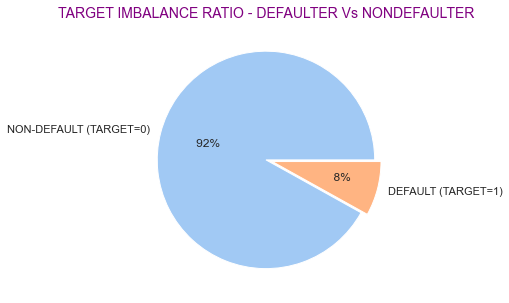

In [52]:
pie_chart_colors = sns.color_palette('pastel')[0:2]
plt.figure(figsize=[171,5])
plt.pie(Fresh_Application['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.06),autopct='%5.f%%', colors=pie_chart_colors )
plt.title('TARGET IMBALANCE RATIO - DEFAULTER Vs NONDEFAULTER',fontsize=14,fontweight= 9,color='purple') 
plt.show()

> From above plot it is pretty clear that there is an imbalance ratio between people who defaulted and who didn't default.
  More than 92% of people didn't default as opposed to 8% who defaulted.

In [53]:
# Selecting required columns for further analysis

Concluding_Columns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [54]:
# Creating new dataframe Fresh_Application_Final with concuding columns
Fresh_Application_Final=Fresh_Application[Concluding_Columns]

In [55]:
Fresh_Application_Final.shape

(307507, 30)

### D.6 - Splitting  df into two separate dataframes for each target

In [56]:
# Dataframe with all the data related to non-defaulters
NEW_APP_NON_DEFAULTERS=Fresh_Application_Final[Fresh_Application_Final.TARGET==0] 

# Dataframe with all the data related to defaulters
NEW_APP_DEFAULTERS=Fresh_Application_Final[Fresh_Application_Final.TARGET==1]   

### D.7 Univariate Analysis for given dataset

**Reusabe udf to plot the univariate categorical variables**


In [57]:
# reusable udf function to count plot for categorical variables
def plot_univariant_analysis_new_app(var):

    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=NEW_APP_NON_DEFAULTERS,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Using normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(NEW_APP_NON_DEFAULTERS))*100), (p.get_x()+0.1, p.get_height()+45))
        
    sns.countplot(x=var, data=NEW_APP_DEFAULTERS,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(NEW_APP_DEFAULTERS))*100), (p.get_x()+0.1, p.get_height()+45))
    
    plt.show()
    

#### D.7.1 Univariate Categorical Column Ordered Analysis 

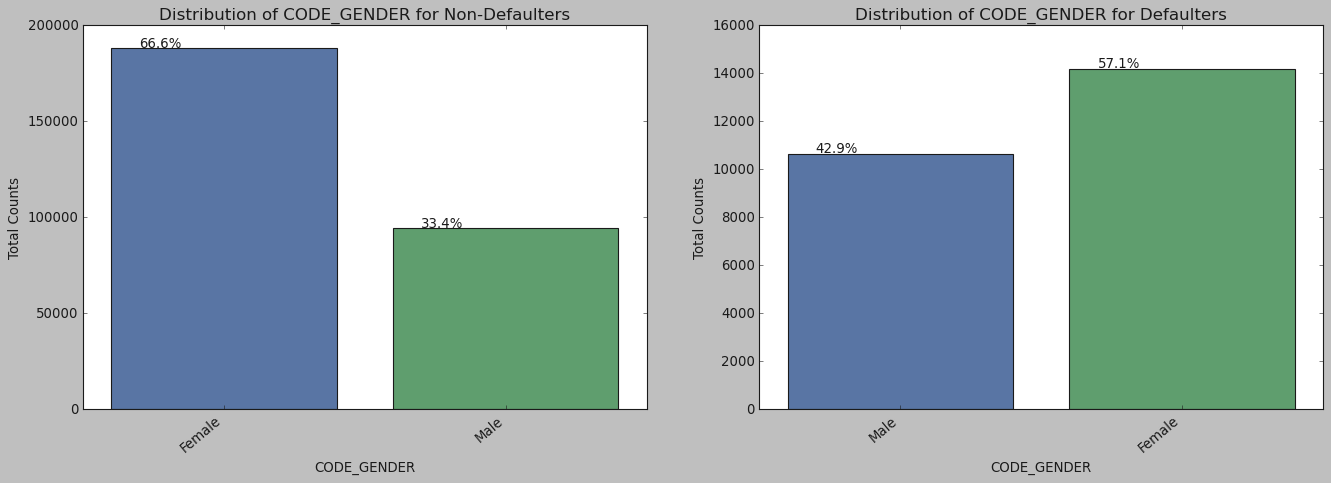

In [58]:
plot_univariant_analysis_new_app('CODE_GENDER')

# Inferences

> We observe that Female contribute 67% to non-defaulters and 57% to the defaulters. 
> <br> We see more female applying for loans than males, So the more number of female defaulters as well. 
> <br> **FEMALE DEFAULTING RATE is much lower compared to ratio of MALE DEFAULTING RATE.**

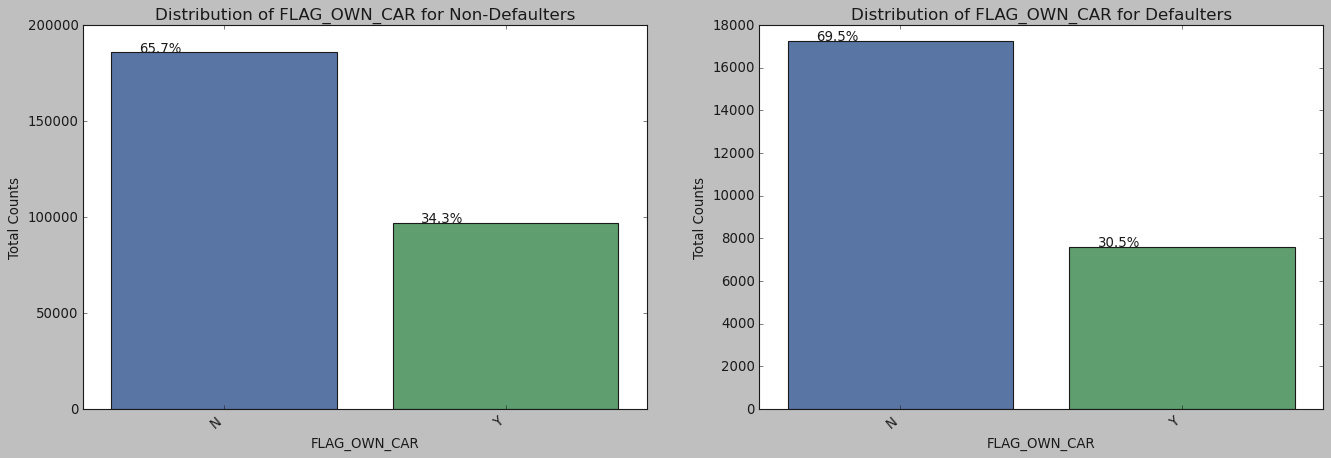

In [59]:
plot_univariant_analysis_new_app('FLAG_OWN_CAR')

> People with cars contribute 65.7% of non defaulters : 69.5% of the defaulters.

>People having car default more often

>By above plot,  we can conclude that the rate of default of people having car is low compared to people who don't.

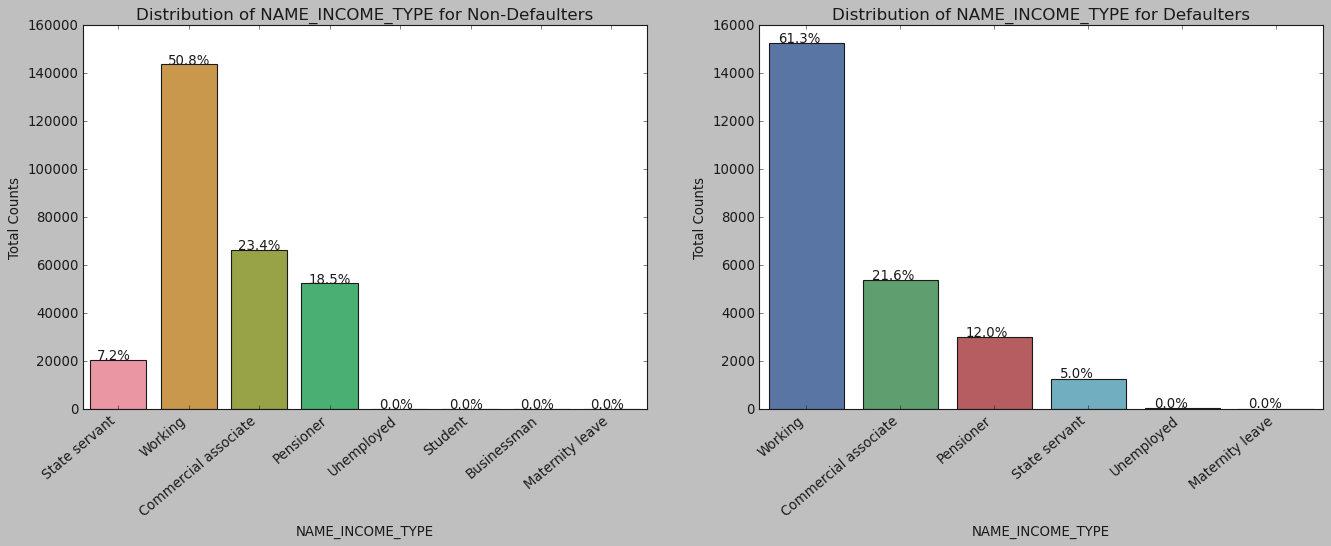

In [60]:
plot_univariant_analysis_new_app('NAME_INCOME_TYPE')

> Students never default it's 0%. Reason may be 

> We can also see that the BusinessMen never default.

>Loans are mostly lended to working category people<br>Working category people contribute 51% :  non defaulters while they contribute to 61% of the defaulters. More chances of defaulting this case.

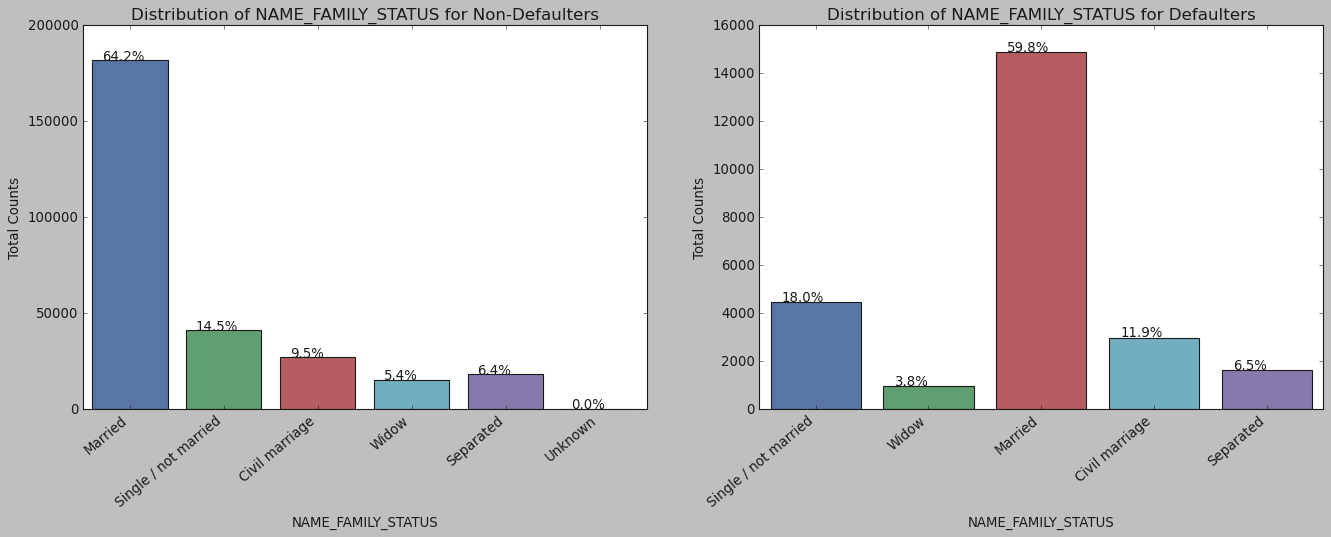

In [61]:
plot_univariant_analysis_new_app('NAME_FAMILY_STATUS')

> Married people apply for more loans in comparision with other family status, They contribute 64.2 % in non defaulters and 59.8 % in defaulters.

> <br> From graph we visualize that Single/non Married people contribute 14.5% to Non Defaulters and 18% to the defaulters. So there is more chances of risk in this case with SIngle/not married people.

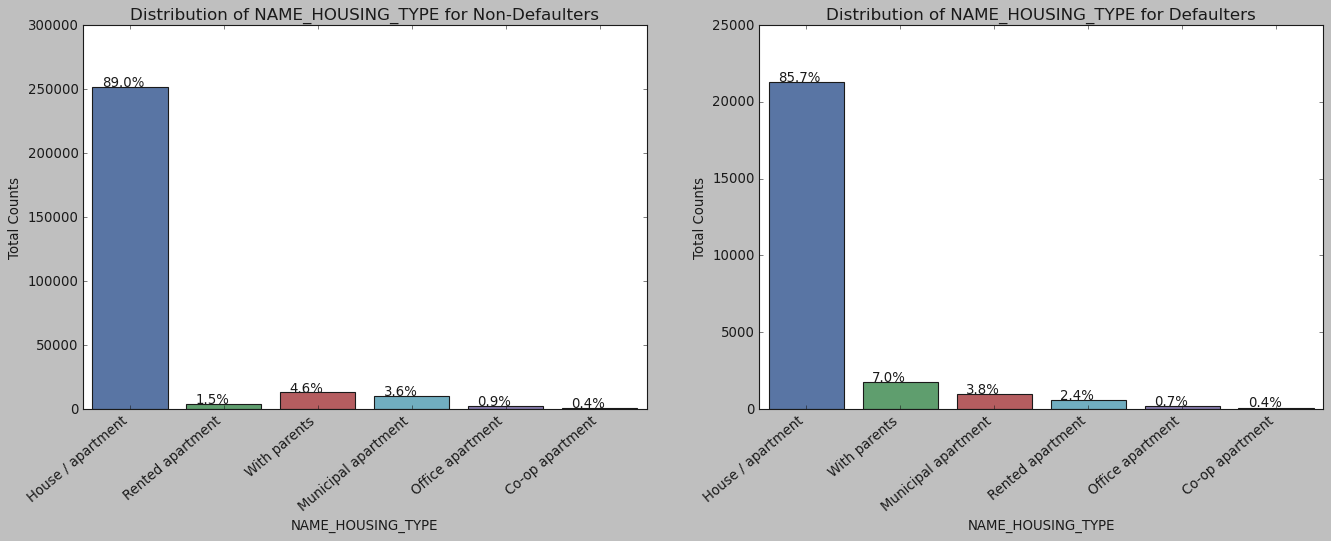

In [62]:
plot_univariant_analysis_new_app('NAME_HOUSING_TYPE')

> From plot it's clear that people who have House/Appartment are applying for more loans.

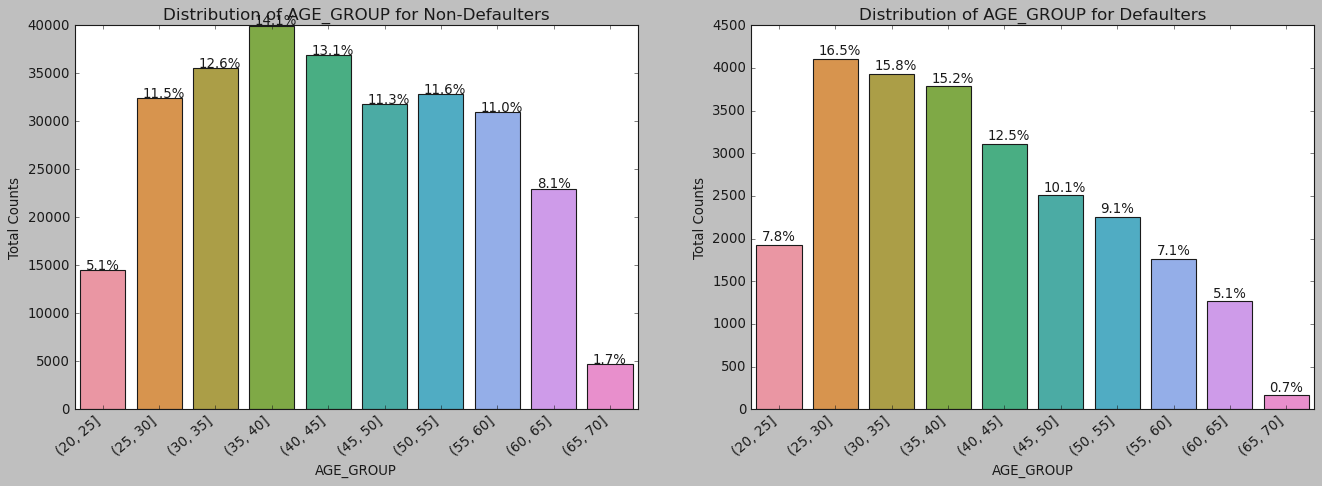

In [63]:
plot_univariant_analysis_new_app('AGE_GROUP')

> From plot we observe that (25,30] range age group people are defaulting more, so morechances of risk to lend them loan

> <br> With increasing age group, people tend to default less starting from the age 25. One of the reasons could be they get employed around that age and with increasing age, their salary also increases.

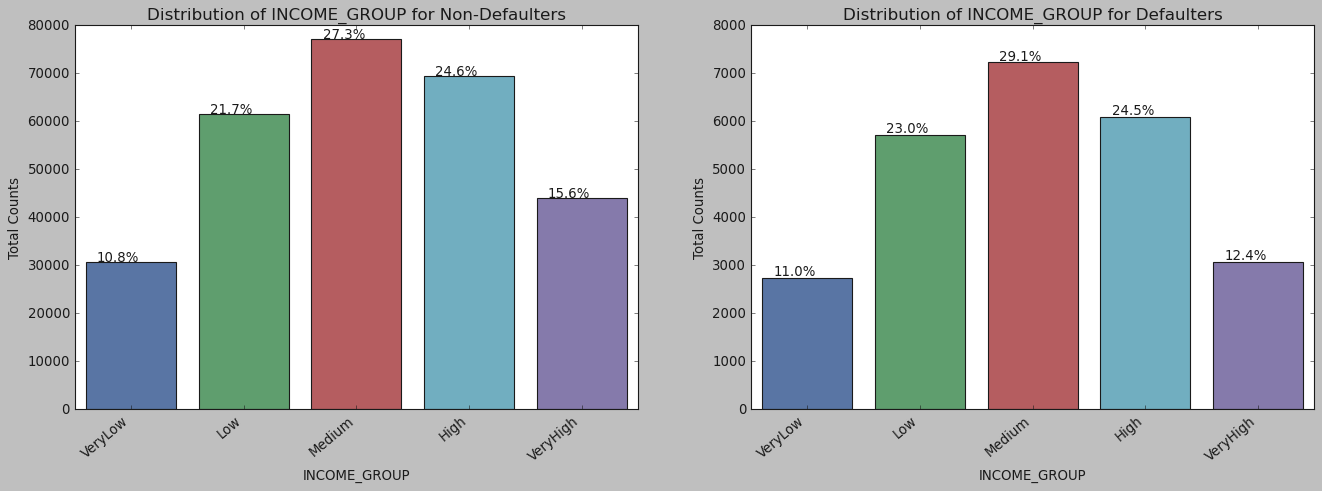

In [64]:
plot_univariant_analysis_new_app('INCOME_GROUP')

> High income category people default less. They contribute 12.4% to the total number of defaulters : 15.6% of Non-Defaulters

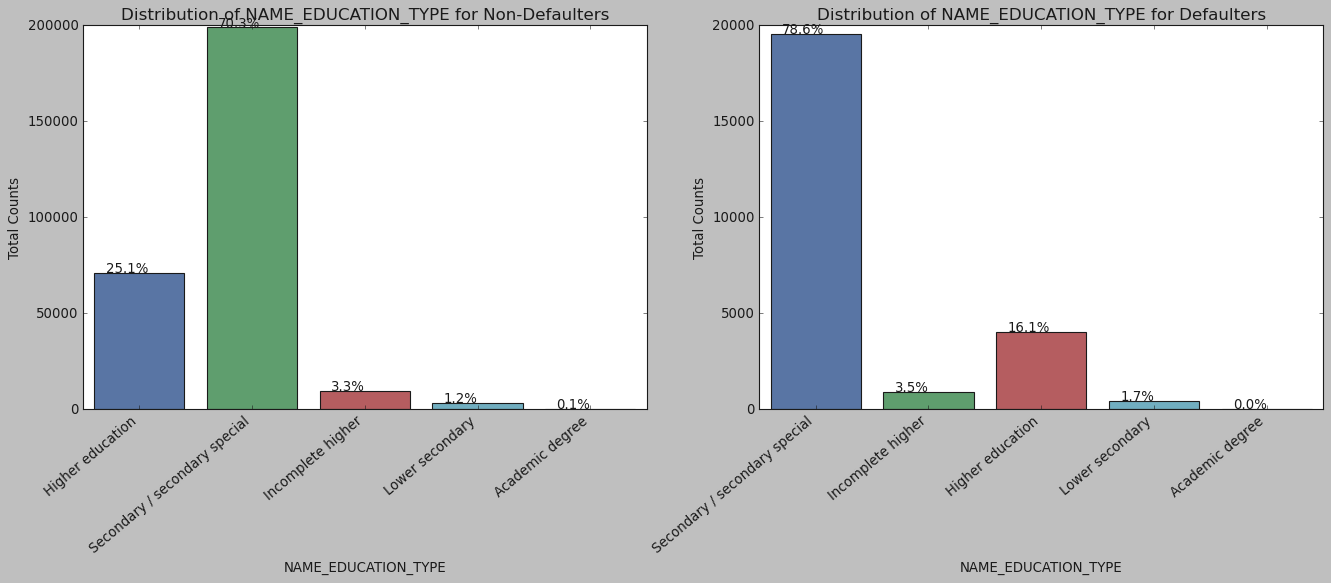

In [65]:
plot_univariant_analysis_new_app('NAME_EDUCATION_TYPE')

> All Education categories are tending to default except for the higher educated ones who are less likely to default and secondary educated people are more likely to default

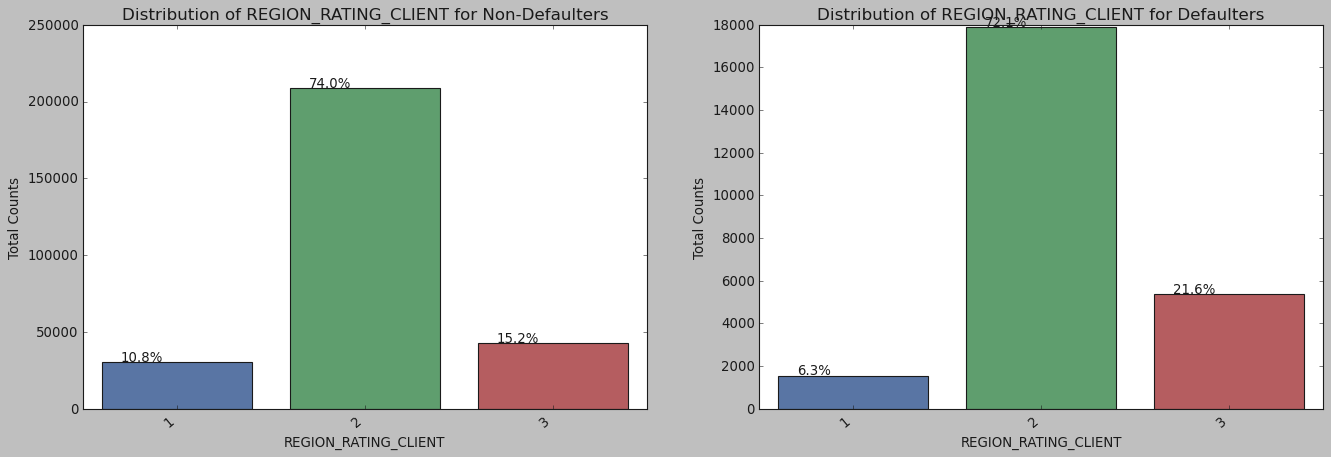

In [66]:
plot_univariant_analysis_new_app('REGION_RATING_CLIENT')

> Second tier region people apply more for loans.

> <br> We can visualize that people living in better areas(Rating 3) tend contribute more to the defaulters.

#### D.7.3 Univariate continuous variable analysis of dataset

In [67]:
# reusable function to plot dist plot for continuous variables
def univariant_analysis_dist_plot(var):

    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
    
    sns.distplot(a=NEW_APP_NON_DEFAULTERS[var],ax=ax1, color='purple')

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=NEW_APP_DEFAULTERS[var],ax=ax2, color='orange')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

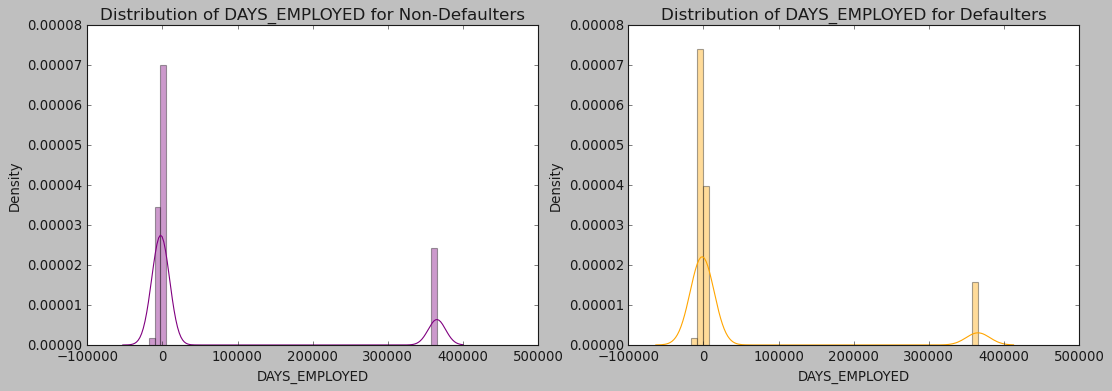

In [68]:
univariant_analysis_dist_plot('DAYS_EMPLOYED')

In [69]:
NEW_APP_DEFAULTERS['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
8.0         6
7.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

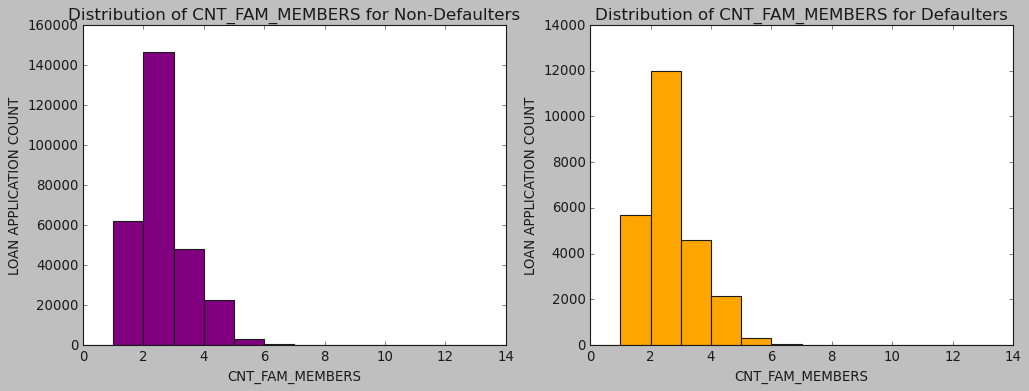

In [70]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
NEW_APP_NON_DEFAULTERS['CNT_FAM_MEMBERS'].plot.hist(bins=range(15),color='purple')
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
NEW_APP_DEFAULTERS['CNT_FAM_MEMBERS'].plot.hist(bins=range(15),color='orange')
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

> We can clearly infer that a family of 3 applies loan more often than the other families

##### D.8 Bivariate Analysis of numerical variables

In [71]:
# reusable function of bivariate analysis scatter plot for continuous variables 
def bivariant_analysis_plot(var1,var2):

    plt.style.use('classic')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=NEW_APP_NON_DEFAULTERS,ax=ax1, color='purple')
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=NEW_APP_DEFAULTERS,ax=ax2, color='purple')
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

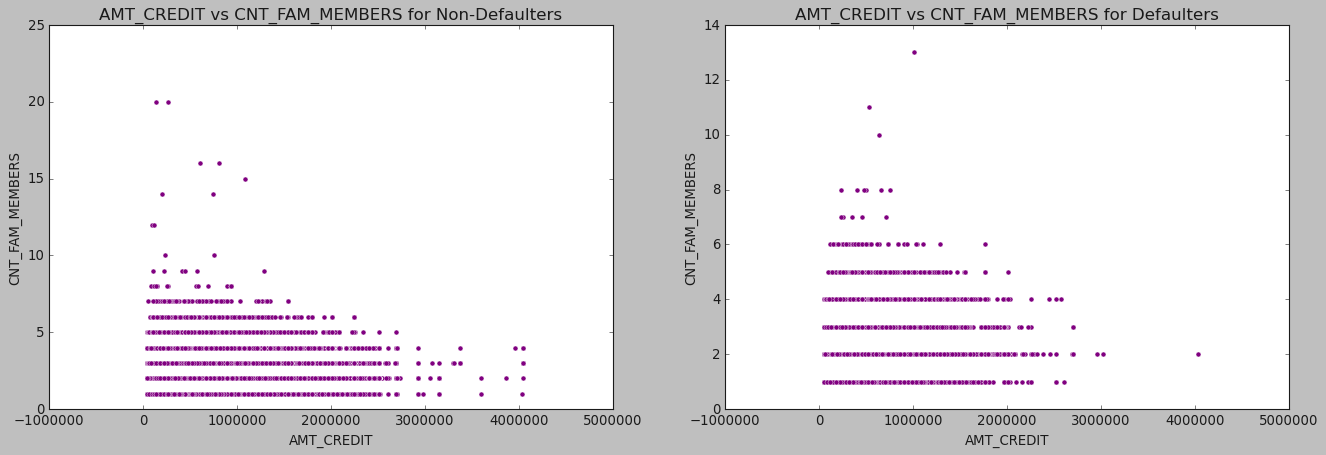

In [72]:
bivariant_analysis_plot('AMT_CREDIT','CNT_FAM_MEMBERS')

> Density in the lower towards left corner is similar in both the case, which means if the family is small and the AMT_CREDIT is low.

> We can observe that larger families and people with larger AMT_CREDIT default less often

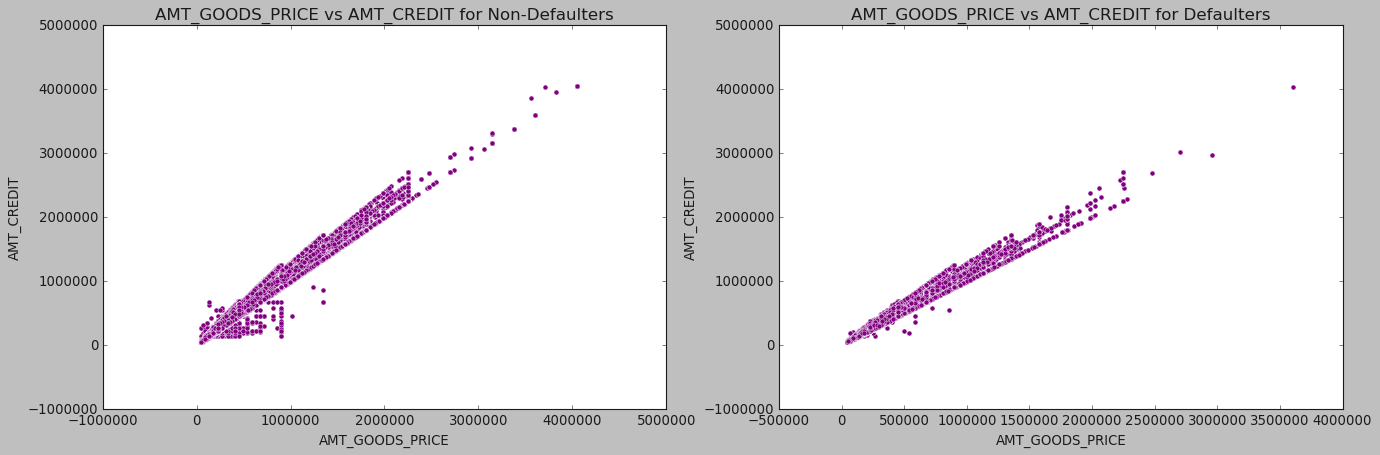

In [73]:
bivariant_analysis_plot('AMT_GOODS_PRICE','AMT_CREDIT')

> We can see that as amount credit increases even amount of goods price increase till in non defaulters, as compared to defaulters

## E. Data Analysis - Previous_Application dataset to examine and interpret it properly

### E.1 Checking Previous data

In [74]:
Previous_Application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [75]:
# Drop all the columns with more than 50% of null values as we did in fresh_application dataset
Previous_Application = Previous_Application.loc[:,Previous_Application.isnull().mean()<=0.5]
Previous_Application.shape

(1670214, 33)

### E.2 Univariate analysis of columns in Previous_application dataset

In [76]:
# reusable udf function to display count plot for categorical variables
def plot_univariant_analysis_prev_app(var):

    plt.style.use('classic')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(16,5))
    
    sns.countplot(x=var, data=Previous_Application,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

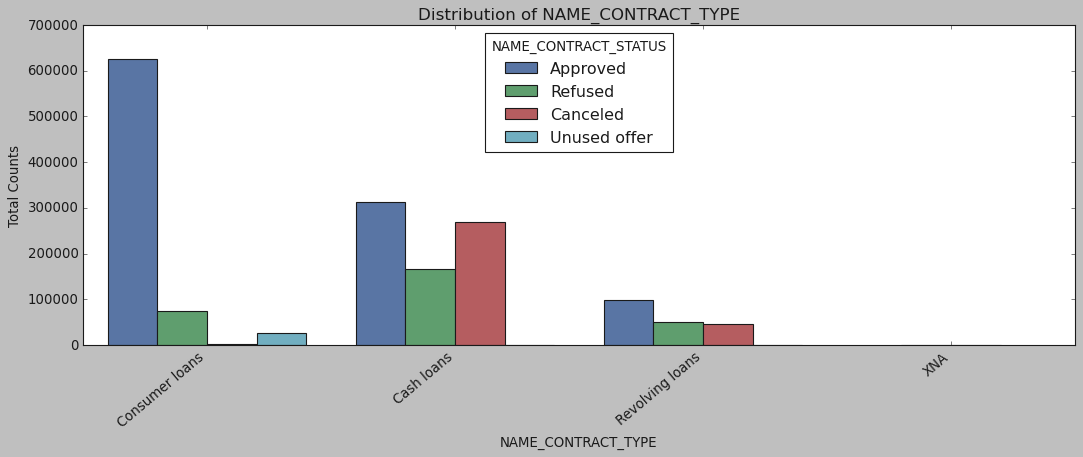

In [77]:
plot_univariant_analysis_prev_app('NAME_CONTRACT_TYPE')

> From the above chart, we can infer that, most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

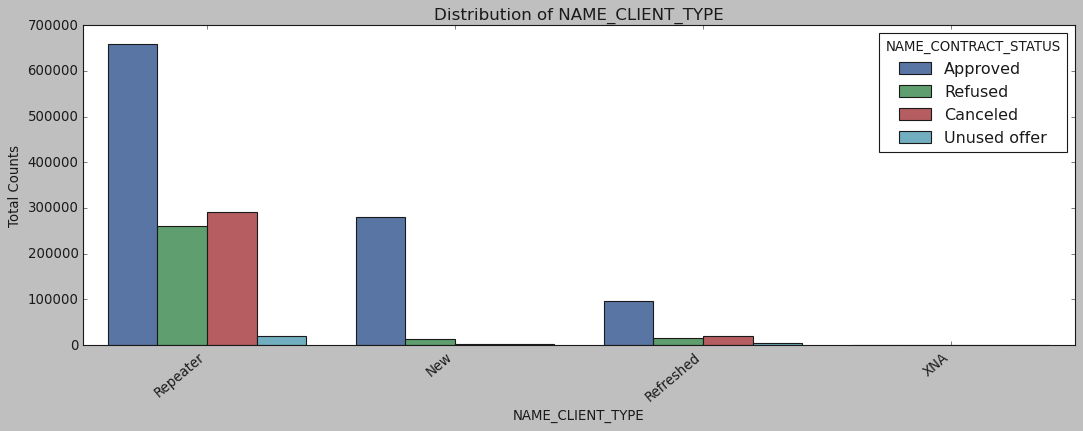

In [78]:
plot_univariant_analysis_prev_app('NAME_CLIENT_TYPE')

>Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused most often.

### E.3 Using pairplot to perform bivariate analysis on numerical columns 

<Figure size 1600x640 with 0 Axes>

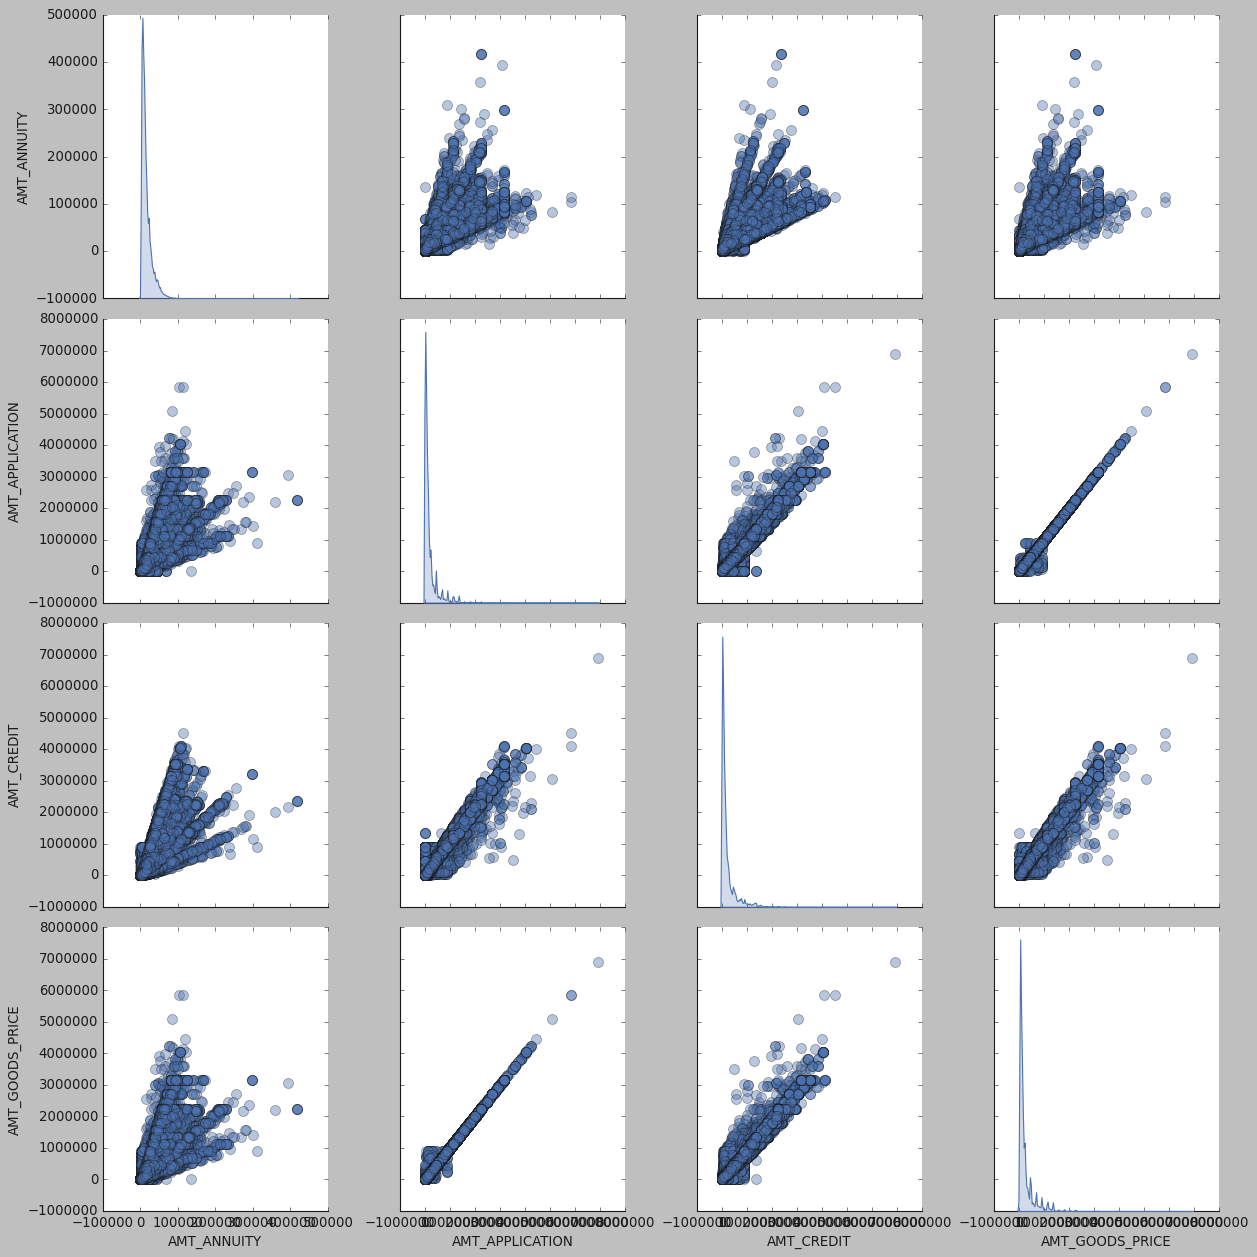

In [79]:
#pair plot to understand correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(Previous_Application[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

> 1. Amount Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors) <br>(1) How much credit client asked in previous application <br> (2)Final credit amount in previous application that was approved by the bank <br>(3) Goods price of good in the previous application.<br><br>

>2. Credit asked by client in previous application is highly influenced by the Goods price of good <br><br>

### E.4 Using box plot to do some more bivariate analysis on categorical vs numeric columns

In [80]:
#by variant analysis function
def plot_by_categorical_numerical(cat, num):

    plt.style.use('classic')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=Previous_Application)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

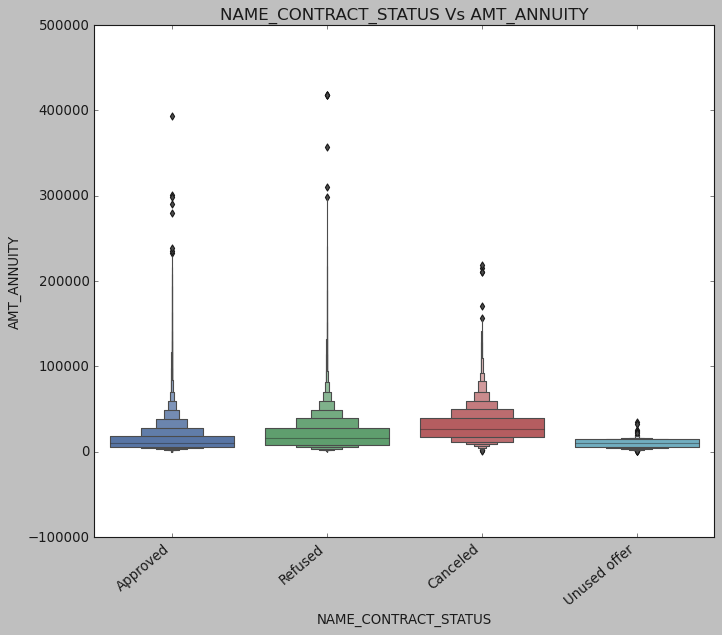

In [81]:
#by-varient analysis of Contract status and Annuity of previous applic b tion
plot_by_categorical_numerical('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

> Loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.<br> 

> We also see that applications with too high AMT ANNUITY also got refused more often than others.

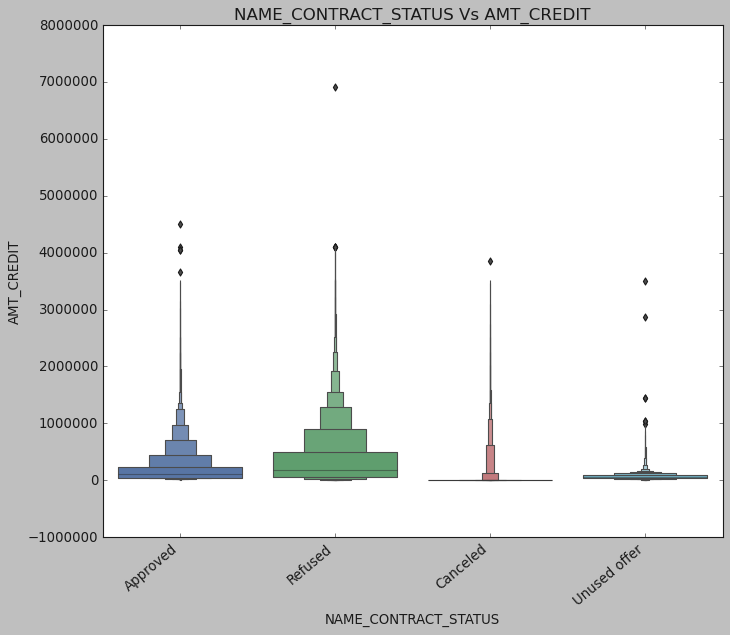

In [82]:
#bi-variant plot of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_categorical_numerical('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

>We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

In [83]:
## Merging the two files to do some analysis
New_Left_Prev = pd.merge(Fresh_Application_Final, Previous_Application, how='left', on=['SK_ID_CURR'])

## 6.1 Inspecting dataframe NewLeftPrev

In [84]:
New_Left_Prev.shape

(1430100, 62)

In [85]:
New_Left_Prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 62 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   SK_ID_CURR                      1430100 non-null  int64   
 1   TARGET                          1430100 non-null  int64   
 2   CODE_GENDER                     1430100 non-null  object  
 3   FLAG_OWN_CAR                    1430100 non-null  object  
 4   FLAG_OWN_REALTY                 1430100 non-null  object  
 5   INCOME_GROUP                    1430100 non-null  category
 6   AGE_GROUP                       1430096 non-null  category
 7   AMT_CREDIT_x                    1430100 non-null  float64 
 8   AMT_INCOME_TOTAL                1430100 non-null  float64 
 9   CREDIT_INCOME_RATIO             1430100 non-null  float64 
 10  NAME_INCOME_TYPE                1430100 non-null  object  
 11  NAME_EDUCATION_TYPE             1430100 non-null  

In [86]:
def plot_univariant_combined(Varx,Vary):
    plt.style.use('classic')
    sns.despine
    colors = sns.color_palette("viridis", n_colors=len(Varx))
    cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)
    NewDat = New_Left_Prev.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5),colormap=cmap1)
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

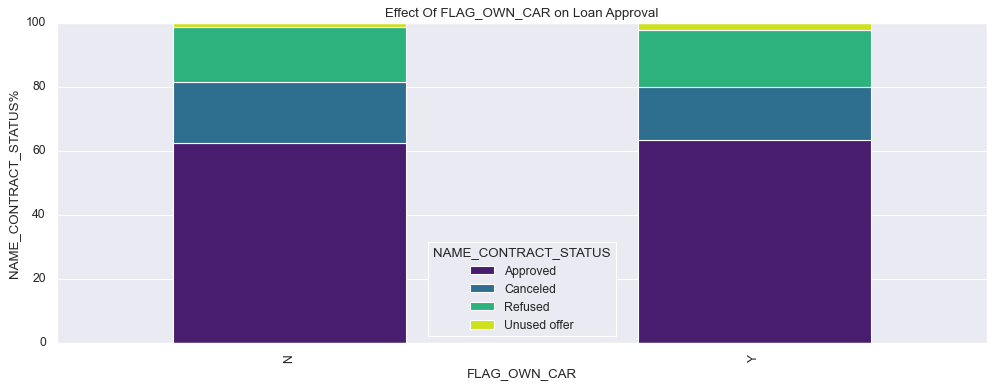

In [87]:
plot_univariant_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

> Car ownership have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can take into consideration regarding car ownership to take decision to approve a loan amount

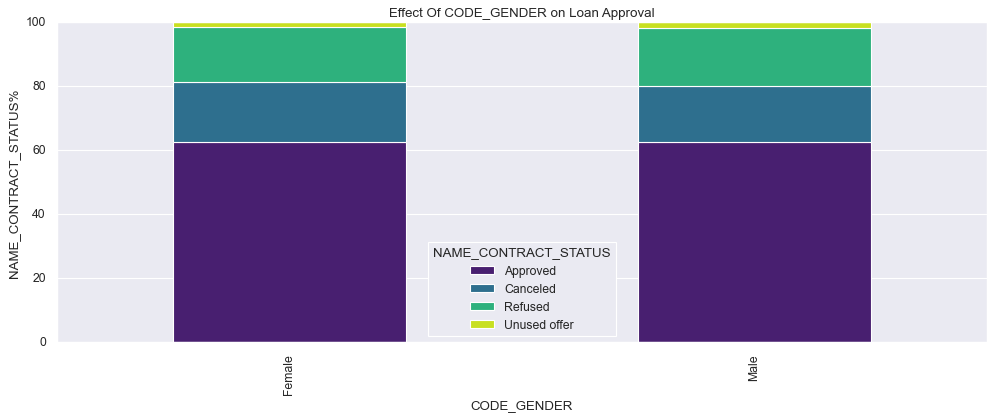

In [88]:
plot_univariant_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

>  Gender doesn't have any effect on application approval or rejection. 
> <br>But we saw earlier that female have lesser chances of default compared to males. The bank can take into consideration regarding female to take decision to approve a loan amount.

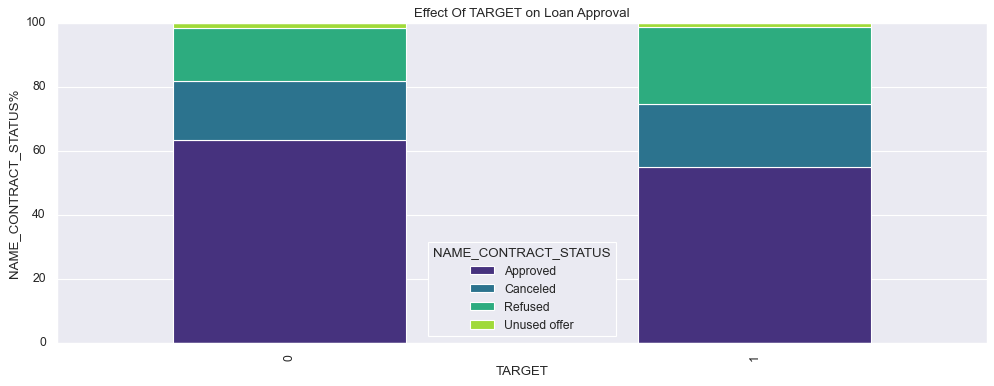

In [89]:
plot_univariant_combined('TARGET','NAME_CONTRACT_STATUS')

**Target variable (0 - Non Defaulter 1 - Defaulter )**

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting. 

# CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.